Visualization saved as 'defense_effectiveness.png'


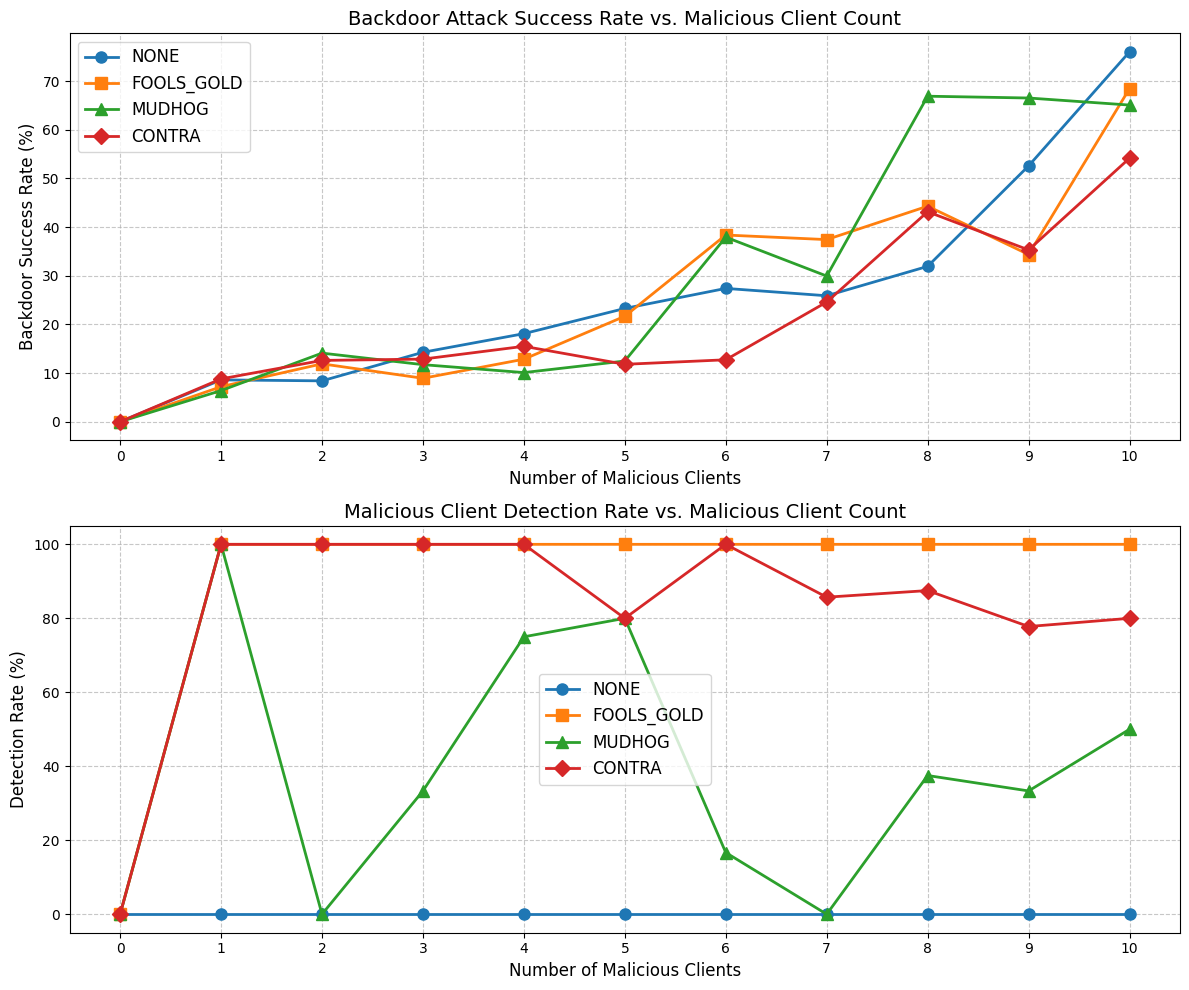

In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np
import sys

def parse_log_file(file_path):
    """Parse the log file to extract defense data."""
    try:
        with open(file_path, 'r') as file:
            log_content = file.read()
    except FileNotFoundError:
        # If file not found, use the example data for demonstration
        log_content = """
2025-03-02 21:25:41,506 - INFO - 
=== Testing NONE Defense ===
2025-03-02 21:26:42,500 - INFO - NONE | Malicious: 2 | Success Rate: 12.60% | Detection Rate: 0.00%
2025-03-02 21:27:29,902 - INFO - NONE | Malicious: 3 | Success Rate: 17.73% | Detection Rate: 0.00%
2025-03-02 21:28:16,626 - INFO - NONE | Malicious: 4 | Success Rate: 20.35% | Detection Rate: 0.00%
2025-03-02 21:28:59,440 - INFO - NONE | Malicious: 5 | Success Rate: 39.70% | Detection Rate: 0.00%
2025-03-02 21:28:59,442 - INFO - 
=== Testing FOOLS_GOLD Defense ===
2025-03-02 21:29:42,338 - INFO - FOOLS_GOLD | Malicious: 2 | Success Rate: 8.40% | Detection Rate: 100.00%
2025-03-02 21:30:19,967 - INFO - FOOLS_GOLD | Malicious: 3 | Success Rate: 7.90% | Detection Rate: 100.00%
2025-03-02 21:31:05,619 - INFO - FOOLS_GOLD | Malicious: 4 | Success Rate: 7.40% | Detection Rate: 75.00%
2025-03-02 21:31:46,000 - INFO - FOOLS_GOLD | Malicious: 5 | Success Rate: 8.68% | Detection Rate: 80.00%
2025-03-02 21:31:46,010 - INFO - 
=== Testing MUDHOG Defense ===
2025-03-02 21:32:40,831 - INFO - MUDHOG | Malicious: 2 | Success Rate: 12.55% | Detection Rate: 0.00%
2025-03-02 21:33:24,425 - INFO - MUDHOG | Malicious: 3 | Success Rate: 34.93% | Detection Rate: 33.33%
2025-03-02 21:34:07,483 - INFO - MUDHOG | Malicious: 4 | Success Rate: 20.48% | Detection Rate: 25.00%
2025-03-02 21:34:50,821 - INFO - MUDHOG | Malicious: 5 | Success Rate: 15.74% | Detection Rate: 60.00%
2025-03-02 21:34:50,828 - INFO - 
=== Testing CONTRA Defense ===
2025-03-02 21:35:41,270 - INFO - CONTRA | Malicious: 2 | Success Rate: 11.95% | Detection Rate: 100.00%
2025-03-02 21:36:21,605 - INFO - CONTRA | Malicious: 3 | Success Rate: 19.50% | Detection Rate: 100.00%
2025-03-02 21:37:09,711 - INFO - CONTRA | Malicious: 4 | Success Rate: 11.47% | Detection Rate: 75.00%
2025-03-02 21:37:57,851 - INFO - CONTRA | Malicious: 5 | Success Rate: 20.48% | Detection Rate: 60.00%
        """
        print("Log file not found. Using example data for demonstration.")

    # Initialize data structure to store parsed information
    data = {}
    
    # Define the regex pattern to extract information
    pattern = r"([A-Z_]+) \| Malicious: (\d+) \| Success Rate: ([\d.]+)% \| Detection Rate: ([\d.]+)%"
    
    # Extract all matches from the log content
    matches = re.finditer(pattern, log_content)
    
    for match in matches:
        defense = match.group(1)
        malicious = int(match.group(2))
        success_rate = float(match.group(3))
        detection_rate = float(match.group(4))
        
        if defense not in data:
            data[defense] = {
                'malicious': [],
                'success_rate': [],
                'detection_rate': []
            }
        
        data[defense]['malicious'].append(malicious)
        data[defense]['success_rate'].append(success_rate)
        data[defense]['detection_rate'].append(detection_rate)
    
    return data

def visualize_defense_effectiveness(data):
    """Visualize the effectiveness of defense systems."""
    plt.figure(figsize=(12, 10))
    
    # First subplot for backdoor success rate
    plt.subplot(2, 1, 1)
    
    markers = ['o', 's', '^', 'D']
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    
    # Define desired order - ensure all four defense systems are included
    defense_order = ['NONE', 'FOOLS_GOLD', 'MUDHOG', 'CONTRA']
    
    # Plot success rate
    for i, defense in enumerate(defense_order):
        if defense in data:
            plt.plot(
                data[defense]['malicious'], 
                data[defense]['success_rate'], 
                marker=markers[i % len(markers)],
                color=colors[i % len(colors)],
                linewidth=2,
                markersize=8,
                label=f"{defense}"
            )
    
    plt.title('Backdoor Attack Success Rate vs. Malicious Client Count', fontsize=14)
    plt.xlabel('Number of Malicious Clients', fontsize=12)
    plt.ylabel('Backdoor Success Rate (%)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12, loc='best')
    plt.xticks(np.unique([m for defense in data.values() for m in defense['malicious']]))
    
    # Second subplot for detection rate
    plt.subplot(2, 1, 2)
    
    for i, defense in enumerate(defense_order):
        if defense in data:
            plt.plot(
                data[defense]['malicious'], 
                data[defense]['detection_rate'], 
                marker=markers[i % len(markers)],
                color=colors[i % len(colors)],
                linewidth=2,
                markersize=8,
                label=f"{defense}"
            )
    
    plt.title('Malicious Client Detection Rate vs. Malicious Client Count', fontsize=14)
    plt.xlabel('Number of Malicious Clients', fontsize=12)
    plt.ylabel('Detection Rate (%)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12, loc='best')
    plt.xticks(np.unique([m for defense in data.values() for m in defense['malicious']]))
    
    plt.tight_layout()
    plt.savefig('defense_effectiveness.png', dpi=300, bbox_inches='tight')
    print("Visualization saved as 'defense_effectiveness.png'")
    plt.show()

if __name__ == "__main__":
    # Get log file path from command line argument or use default
    file_path = sys.argv[1] if len(sys.argv) > 1 else "federated_learning_defense.log"
    
    # Parse log file
    data = parse_log_file("logs/experiment_20250302_215210.log")
    
    # Visualize defense effectiveness
    visualize_defense_effectiveness(data)